<a href="https://colab.research.google.com/github/ansal1202/Prediction-of-Amazon-Prime-Subscription/blob/main/Amazon_Userbase_RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download kaggle data in Google Colab
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
! kaggle datasets download -d 'arnavsmayan/amazon-prime-userbase-dataset'
! mkdir amazon-prime-userbase
! unzip amazon-prime-userbase-dataset.zip -d amazon-prime-userbase


Dataset URL: https://www.kaggle.com/datasets/arnavsmayan/amazon-prime-userbase-dataset
License(s): CC0-1.0
  0% 0.00/104k [00:00<?, ?B/s]
100% 104k/104k [00:00<00:00, 51.0MB/s]
Archive:  amazon-prime-userbase-dataset.zip
  inflating: amazon-prime-userbase/amazon_prime_users.csv  


In [3]:
#載入資料集
import pandas as pd
df = pd.read_csv('amazon-prime-userbase/amazon_prime_users.csv')
df

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


**資料概況**

*   User ID : 使用者ID
*   Name : 名字                         
*   Email Address : 電子郵件地址                
*   Username : 暱稱                        
*   Date of Birth : 生日                    
*   Gender : 性別                            
*   Location : 住址                          
*   Membership Start Date : 訂閱起日             
*   Membership End Date : 訂閱訖日              
*   Subscription Plan :  訂閱方案               
*   Payment Information : 付款方式               
*   Renewal Status : 續訂方式                 
*   Usage Frequency : 使用頻率                
*   Purchase History :  購買紀錄               
*   Favorite Genres : 購物偏好                 
*   Devices Used : 登入/使用設備                     
*   Engagement Metrics : 參與程度              
*   Feedback/Ratings :  評分              
*   Customer Support Interactions : 客服互動次數   

In [ ]:
# 檢查是否有缺失值
df.isnull().any()

,0
User ID,False
Name,False
Email Address,False
Username,False
Date of Birth,False
Gender,False
Location,False
Membership Start Date,False
Membership End Date,False
Subscription Plan,False


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [5]:
df_copy = df.copy()

In [6]:
# 刪除不需要的欄位
df_copy = df_copy.drop(['User ID', 'Name', 'Email Address', 'Username', 'Location'], axis=1)

# **RFM分析**

RFM模型

* 活躍度（Recency）:使用Membership End Date，距離到期日月久，給予較高的分數
* 忠誠度（Frequency）:Usage Frequency中使用頻率越高，給予越高的分數
* 消費金額（Monetary）:Subscription Plan中，年訂閱分數較高，月訂閱分數較低






In [7]:
#計算剩餘會員天數
#資料的最後更新日為2024年5月
df_copy['Recency'] = (pd.to_datetime(df_copy['Membership End Date']) - pd.Timestamp(2024, 4, 30)).dt.days
df_copy['Recency_Level'] = pd.cut(df_copy['Recency'], bins=[0,270,300,330,360], labels=[4,3,2,1], right=False).astype(float)

#將用戶的使用頻率轉換為數值
usage_frequency_mapping = {
    'Occasional': 1,
    'Regular': 2,
    'Frequent': 3
}
df_copy['Usage Frequency'] = df_copy['Usage Frequency'].map(usage_frequency_mapping)

#將訂閱方案轉換為數值
monetary_map = {'Annual': 2, 'Monthly': 1}
df_copy['Monetary Score'] = df_copy['Subscription Plan'].map(monetary_map)

In [ ]:
df_copy

,Date of Birth,Gender,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Recency,Recency_Level,Monetary Score
0,1953-06-03,Male,2024-01-15,2025-01-14,Annual,Mastercard,Manual,2,Electronics,Documentary,Smart TV,Medium,3.6,3,259,4.0,2
1,1978-07-08,Male,2024-01-07,2025-01-06,Monthly,Visa,Manual,2,Electronics,Horror,Smartphone,Medium,3.8,7,251,4.0,1
2,1994-12-06,Female,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,2,Books,Comedy,Smart TV,Low,3.3,8,348,1.0,1
3,1964-12-22,Female,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,2,Electronics,Documentary,Smart TV,High,3.3,7,268,4.0,1
4,1961-06-04,Male,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,3,Clothing,Drama,Smart TV,Low,4.3,1,289,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1967-08-19,Male,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,3,Electronics,Comedy,Smartphone,Medium,4.9,2,269,4.0,2
2496,1980-10-23,Male,2024-03-03,2025-03-03,Annual,Amex,Manual,3,Books,Comedy,Smart TV,Medium,4.0,0,307,2.0,2
2497,1972-03-31,Female,2024-02-09,2025-02-08,Annual,Visa,Manual,3,Electronics,Documentary,Tablet,Low,4.9,8,284,3.0,2
2498,1965-08-02,Female,2024-02-18,2025-02-17,Monthly,Visa,Manual,2,Clothing,Comedy,Smartphone,High,3.4,7,293,3.0,1


<ipython-input-14-6c9fcf47378b>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Counts")


<Figure size 1200x600 with 0 Axes>

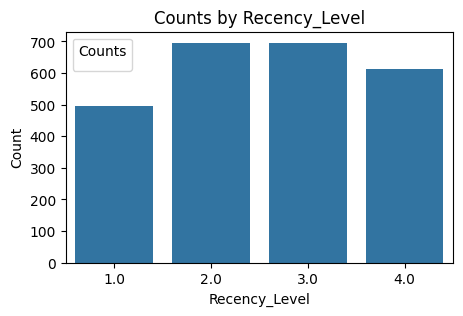

<ipython-input-14-6c9fcf47378b>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Counts")


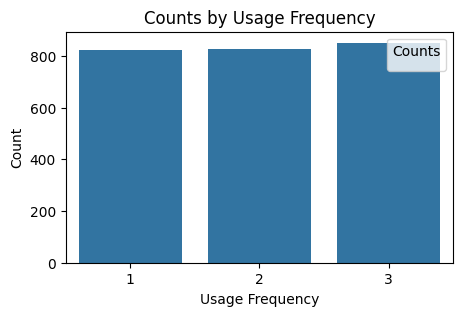

<ipython-input-14-6c9fcf47378b>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Counts")


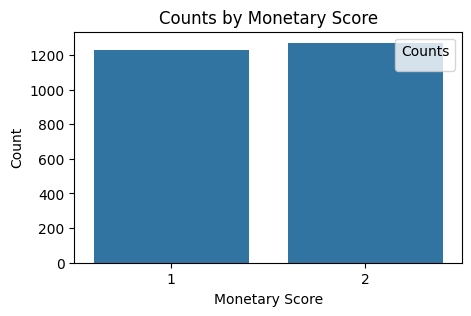

In [14]:
#查看三個指標不同等級所占的比例
columns = ['Recency_Level', 'Usage Frequency', 'Monetary Score']
plt.figure(figsize=(12, 6))

for var in columns:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df_copy, x=var, )
    plt.title(f"Counts by {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.legend(title="Counts")
    plt.show()

定義顧客分群

In [15]:
#將指標數值轉化為0或1
#定義Recency超過3的為1，其他為0
df_copy['New_Recency'] = (df_copy['Recency_Level'].apply(lambda x: 1 if x in [3, 4] else 0))
#定義Frequency是3的為1，其他為0
df_copy['New_Frequency'] = (df_copy['Usage Frequency'].apply(lambda x: 1 if x in [3] else 0))
#定義Monetary是3的為1，其他為0
df_copy['New_Monetary'] = (df_copy['Monetary Score'].apply(lambda x: 1 if x in [2] else 0))
## 顯示數據
df_copy

,Date of Birth,Gender,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,...,Customer Support Interactions,Recency,Recency_Level,Monetary Score,New_Recency,New_Frequency,New_Monetary,Customer_Group_value,RFM_顧客分群結果,RFM_Customer_Value
0,1953-06-03,Male,2024-01-15,2025-01-14,Annual,Mastercard,Manual,2,Electronics,Documentary,...,3,259,4.0,2,1,0,1,101,消費頻率較低的顧客,Medium
1,1978-07-08,Male,2024-01-07,2025-01-06,Monthly,Visa,Manual,2,Electronics,Horror,...,7,251,4.0,1,1,0,0,100,新顧客,Medium
2,1994-12-06,Female,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,2,Books,Comedy,...,8,348,1.0,1,0,0,0,0,不是我們的客群,Low
3,1964-12-22,Female,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,2,Electronics,Documentary,...,7,268,4.0,1,1,0,0,100,新顧客,Medium
4,1961-06-04,Male,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,3,Clothing,Drama,...,1,289,3.0,2,1,1,1,111,最重要的顧客,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1967-08-19,Male,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,3,Electronics,Comedy,...,2,269,4.0,2,1,1,1,111,最重要的顧客,High
2496,1980-10-23,Male,2024-03-03,2025-03-03,Annual,Amex,Manual,3,Books,Comedy,...,0,307,2.0,2,0,1,1,11,近期流失的重要顧客,Medium
2497,1972-03-31,Female,2024-02-09,2025-02-08,Annual,Visa,Manual,3,Electronics,Documentary,...,8,284,3.0,2,1,1,1,111,最重要的顧客,High
2498,1965-08-02,Female,2024-02-18,2025-02-17,Monthly,Visa,Manual,2,Clothing,Comedy,...,7,293,3.0,1,1,0,0,100,新顧客,Medium


In [16]:
## 組合欄位
df_copy['Customer_Group_value'] = df_copy['New_Recency']*100+ df_copy['New_Frequency']*10 + df_copy['New_Monetary']

## 定義分群標準
def customer_group(value):
 if value == 111:
   label = '最重要的顧客'
 elif value == 110:
   label = '未來有消費潛力的顧客'
 elif value == 101:
   label = '消費頻率較低的顧客'
 elif value == 100:
   label = '新顧客'
 elif value == 11:
   label = '近期流失的重要顧客'
 elif value == 10:
   label = '普通顧客'
 elif value == 1:
   label = '流失掉的高消費顧客'
 elif value == 0:
   label = '不是我們的客群'
 return label

def customer_value(value):
 if value == 111:
   label = 'High'
 elif value == 110:
   label = 'High'
 elif value == 101:
   label = 'Medium'
 elif value == 100:
   label = 'Medium'
 elif value == 11:
   label = 'Medium'
 elif value == 10:
   label = 'Medium'
 elif value == 1:
   label = 'Low'
 elif value == 0:
   label = 'Low'
 return label

## 顧客分群
df_copy['RFM_顧客分群結果'] = df_copy['Customer_Group_value'].apply(customer_group)
df_copy['RFM_Customer_Value'] = df_copy['Customer_Group_value'].apply(customer_value)
df_copy

,Date of Birth,Gender,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,...,Customer Support Interactions,Recency,Recency_Level,Monetary Score,New_Recency,New_Frequency,New_Monetary,Customer_Group_value,RFM_顧客分群結果,RFM_Customer_Value
0,1953-06-03,Male,2024-01-15,2025-01-14,Annual,Mastercard,Manual,2,Electronics,Documentary,...,3,259,4.0,2,1,0,1,101,消費頻率較低的顧客,Medium
1,1978-07-08,Male,2024-01-07,2025-01-06,Monthly,Visa,Manual,2,Electronics,Horror,...,7,251,4.0,1,1,0,0,100,新顧客,Medium
2,1994-12-06,Female,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,2,Books,Comedy,...,8,348,1.0,1,0,0,0,0,不是我們的客群,Low
3,1964-12-22,Female,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,2,Electronics,Documentary,...,7,268,4.0,1,1,0,0,100,新顧客,Medium
4,1961-06-04,Male,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,3,Clothing,Drama,...,1,289,3.0,2,1,1,1,111,最重要的顧客,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1967-08-19,Male,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,3,Electronics,Comedy,...,2,269,4.0,2,1,1,1,111,最重要的顧客,High
2496,1980-10-23,Male,2024-03-03,2025-03-03,Annual,Amex,Manual,3,Books,Comedy,...,0,307,2.0,2,0,1,1,11,近期流失的重要顧客,Medium
2497,1972-03-31,Female,2024-02-09,2025-02-08,Annual,Visa,Manual,3,Electronics,Documentary,...,8,284,3.0,2,1,1,1,111,最重要的顧客,High
2498,1965-08-02,Female,2024-02-18,2025-02-17,Monthly,Visa,Manual,2,Clothing,Comedy,...,7,293,3.0,1,1,0,0,100,新顧客,Medium


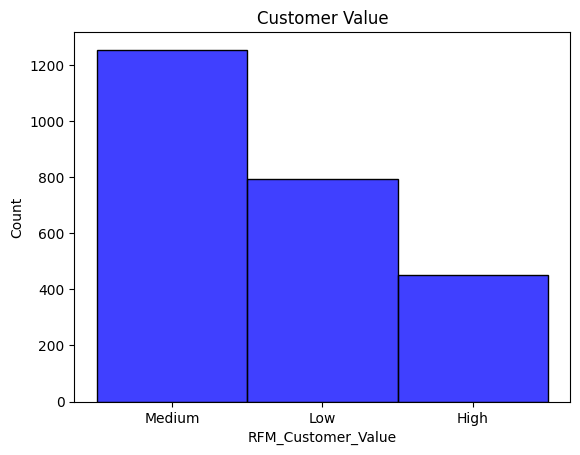

In [17]:
#查看分群後不同級別所佔的比例
sns.histplot(df_copy['RFM_Customer_Value'], bins=5, kde=False, color='blue')
plt.title('Customer Value')
plt.show()

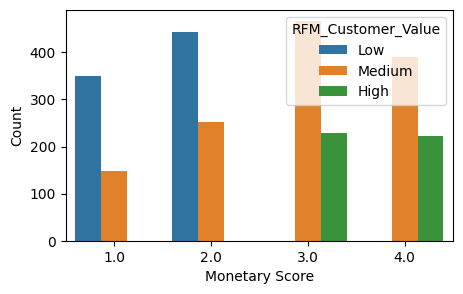

In [18]:
#查看將剩餘天數分級後，不同群的客戶所佔得數量
plt.figure(figsize=(5,3))
sns.countplot(data=df_copy, x='Recency_Level', hue='RFM_Customer_Value')
plt.xlabel(var)
plt.ylabel("Count")
plt.show()

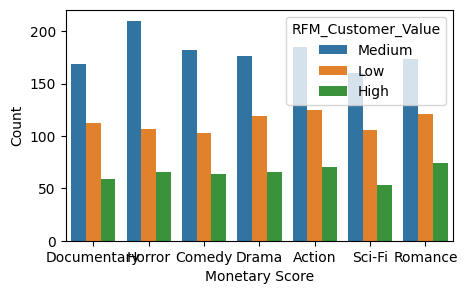

In [19]:
#查看在不同喜好類型中，不同群的客戶所佔得數量

plt.figure(figsize=(5,3))
sns.countplot(data=df_copy, x='Favorite Genres', hue='RFM_Customer_Value')
plt.xlabel(var)
plt.ylabel("Count")
plt.show()

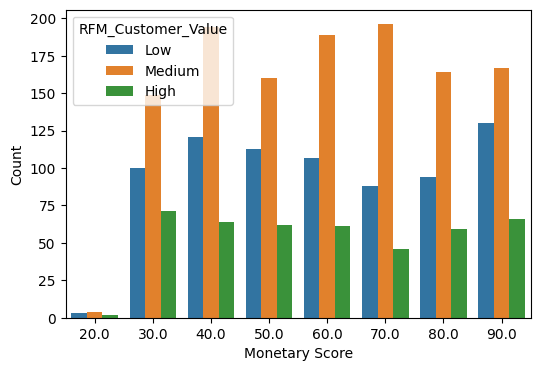

In [20]:
#查看在不同年齡，不同群的客戶所佔得數量
# Convert 'Date of Birth' to datetime objects
df_copy['Date of Birth'] = pd.to_datetime(df_copy['Date of Birth'])
# 計算年齡並拆分成數個區間
current_date = datetime.now()
current_year = current_date.year
df_copy['Age'] = current_year - df_copy['Date of Birth'].dt.year
df_copy['Age_Group'] = pd.cut(df_copy['Age'], bins=[0,20,30,40,50,60,70,80,90], labels=[20,30,40,50,60,70,80,90], right=False).astype(float)

#繪圖
plt.figure(figsize=(6,4))
sns.countplot(data=df_copy, x='Age_Group', hue='RFM_Customer_Value')
plt.xlabel(var)
plt.ylabel("Count")
plt.show()


* 可觀察到90歲以上的低價值用戶特別多
* 年輕用戶似乎更常瀏覽網站
* 未成年得用戶比例極低


# **探索客戶的留存率及流失率**

In [21]:
# Convert 'Date of Birth' to datetime objects
df_copy['Membership Start Date'] = pd.to_datetime(df_copy['Membership Start Date'])
#取出日期的月份名稱
df_copy['Month'] = df_copy['Membership Start Date'].dt.month_name()
# 計算每個月的頻率計數Date of Birt
freq_counts = df_copy.groupby(['Month', 'Usage Frequency']).size().reset_index(name='Count')

# 計算每個月內的百分比
freq_counts['Percentage'] = freq_counts.groupby('Month')['Count'].transform(lambda x: x / x.sum() * 100)

# 透視表形式整理數據
pivot_table = freq_counts.pivot(index='Month', columns='Usage Frequency', values='Percentage').fillna(0)

print(pivot_table)

Usage Frequency          1          2          3
Month                                           
April            36.746988  33.433735  29.819277
February         31.643625  34.254992  34.101382
January          31.435964  32.858991  35.705045
March            33.736559  32.123656  34.139785


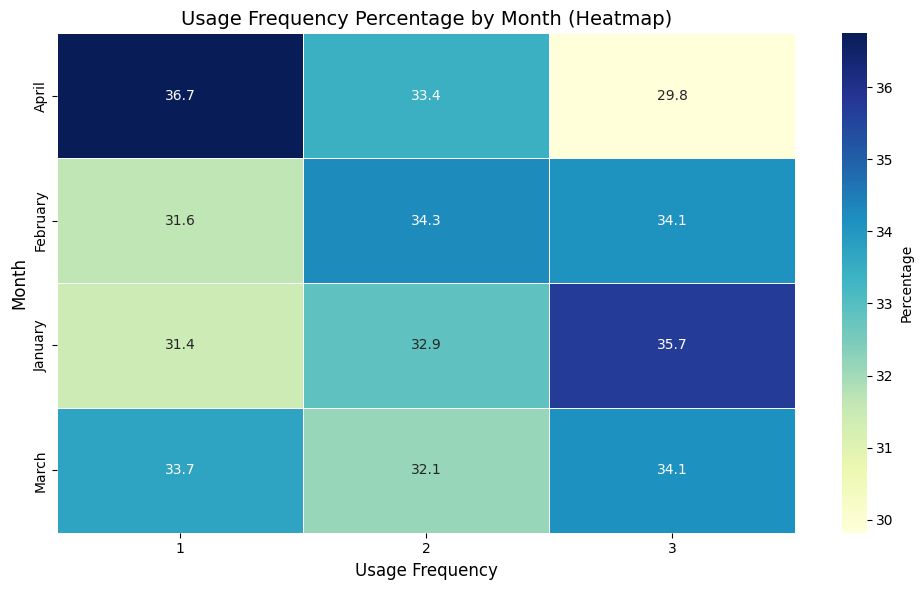

In [22]:
# 繪製熱力圖
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'}, linewidths=0.5)

# 添加標題和軸標籤
plt.title('Usage Frequency Percentage by Month (Heatmap)', fontsize=14)
plt.xlabel('Usage Frequency', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

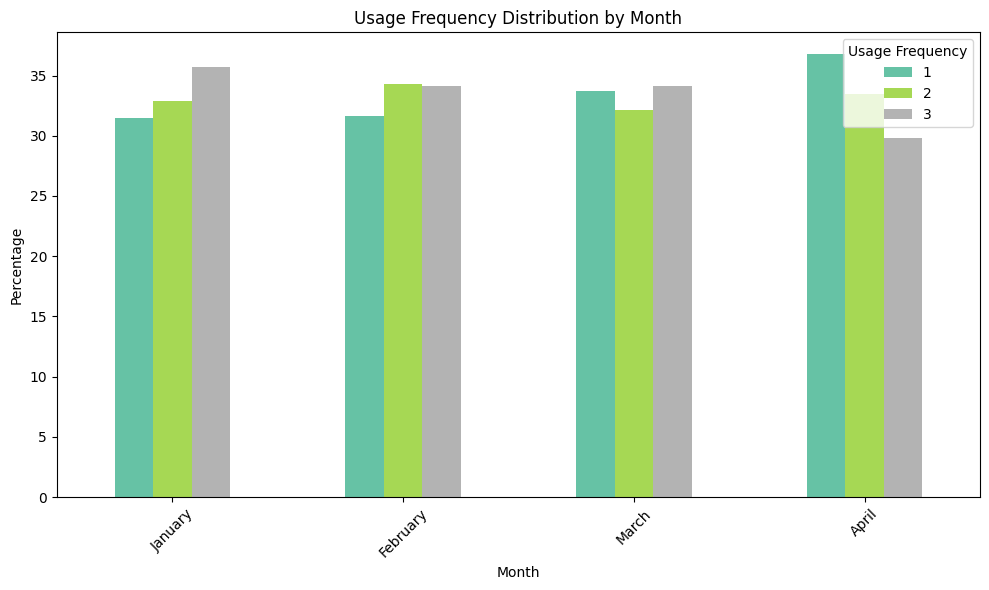

In [25]:
# 按月份順序建立索引
month_order = ["January", "February", "March", "April"]
pivot_table.index = pd.Categorical(pivot_table.index, categories=month_order, ordered=True)
pivot_table = pivot_table.sort_index()

# 繪製長條圖
pivot_table.plot(kind='bar', figsize=(10, 6), cmap='Set2')

plt.title('Usage Frequency Distribution by Month')
plt.ylabel('Percentage')
plt.xlabel('Month')
plt.legend(title='Usage Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* 可以觀察到當年度越早開始使用的人，其使用頻率越高，並隨著月份遞減
* 其中4月的屬於低使用頻率的比例較高，可能是該月份的收集樣本數較少，導致該月份呈現的使用頻率較低
